In [8]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [9]:
hists={}
for filename in os.listdir('../pods/2016'):
    print(filename)
    with gzip.open('../pods/2016/'+filename) as fin:
        hin = pickle.load(fin)
        for k in hin.keys():
            print(k)
            if k in hists: hists[k]+=hin[k]
            else: hists[k]=hin[k]


WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.pkl.gz
recoil
ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz
recoil_iszeroL
mindphi_iszeroL
j1pt_iszeroL
fj1pt_iszeroL
njets_iszeroL
nfjets_iszeroL
fjmass_iszeroL
TvsQCD_iszeroL
WvsQCD_iszeroL
ZvsQCD_iszeroL
VvsQCD_iszeroL
ZHbbvsQCD_iszeroL
ZHccvsQCD_iszeroL
WcqvsQCD_iszeroL
WqqvsQCD_iszeroL
ZbbvsQCD_iszeroL
ZccvsQCD_iszeroL
ZqqvsQCD_iszeroL
ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz
recoil_iszeroL
mindphi_iszeroL
j1pt_iszeroL
fj1pt_iszeroL
njets_iszeroL
nfjets_iszeroL
fjmass_iszeroL
TvsQCD_iszeroL
WvsQCD_iszeroL
ZvsQCD_iszeroL
VvsQCD_iszeroL
ZHbbvsQCD_iszeroL
ZHccvsQCD_iszeroL
WcqvsQCD_iszeroL
WqqvsQCD_iszeroL
ZbbvsQCD_iszeroL
ZccvsQCD_iszeroL
ZqqvsQCD_iszeroL
ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz
recoil_iszeroL
mindphi_iszeroL
j1pt_iszeroL
fj1pt_iszeroL
njets_iszeroL
nfjets_iszeroL
fjmass_iszeroL
TvsQCD_iszeroL
WvsQCD_iszeroL
ZvsQCD_iszeroL
VvsQCD_iszeroL
ZHbbvsQCD_iszeroL
ZHccvsQCD_iszeroL
WcqvsQCD_iszeroL
Wqqv

In [10]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset",)
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zjets"] = ("ZJets*",)
#process_map["Wjets"] = ("WJets*",)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)


No handles with labels found to put in legend.


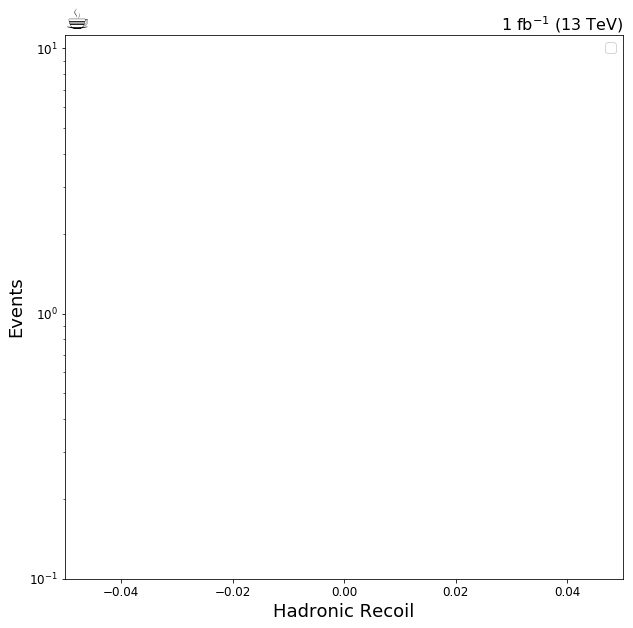

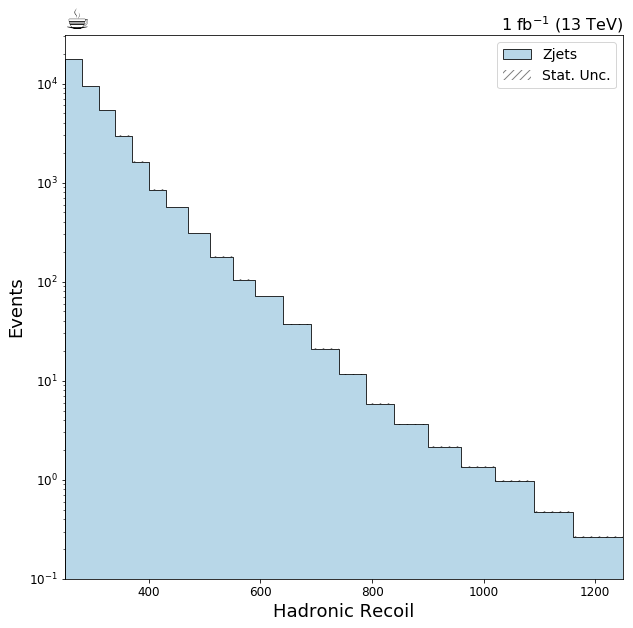

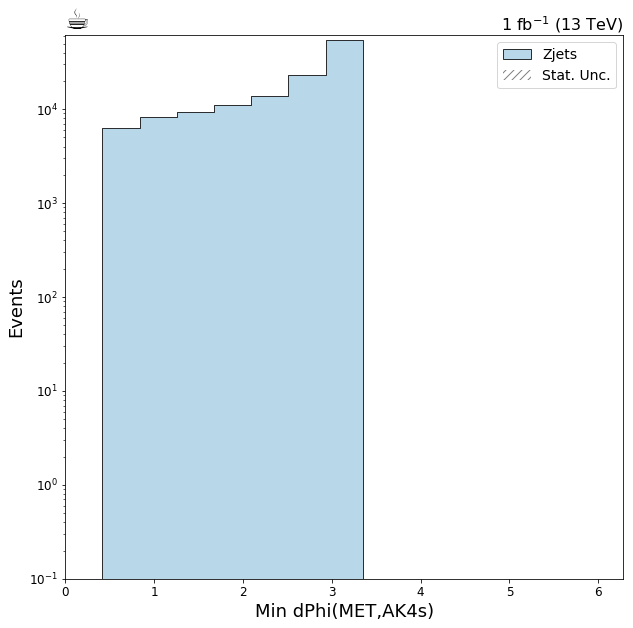

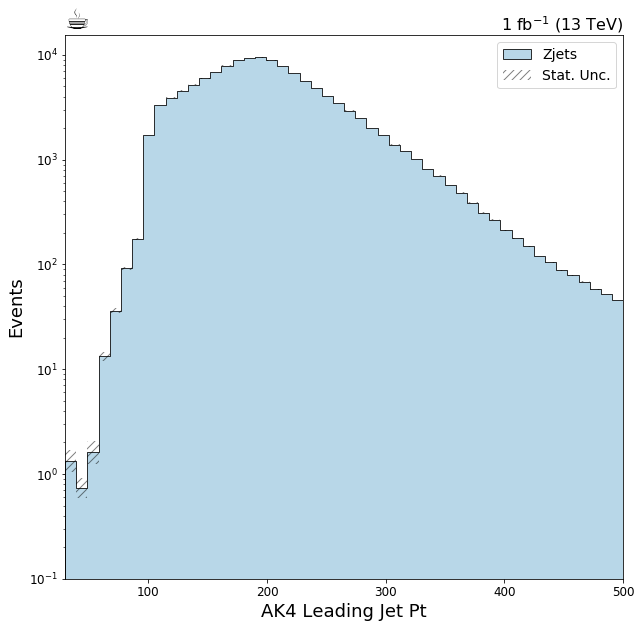

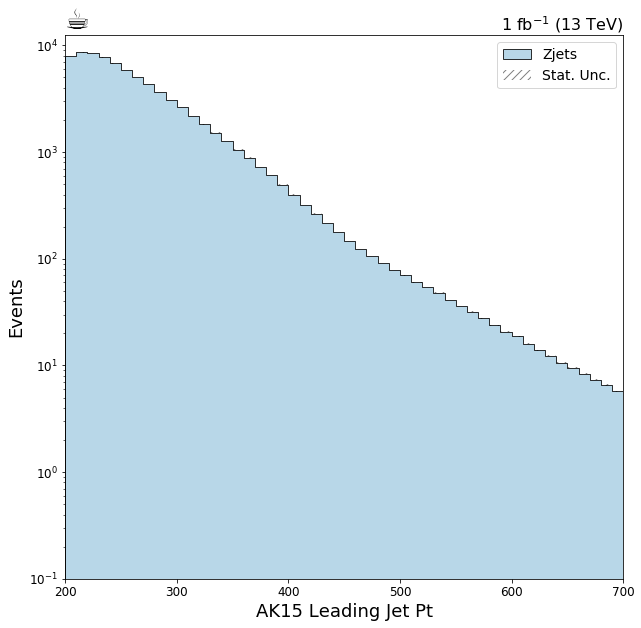

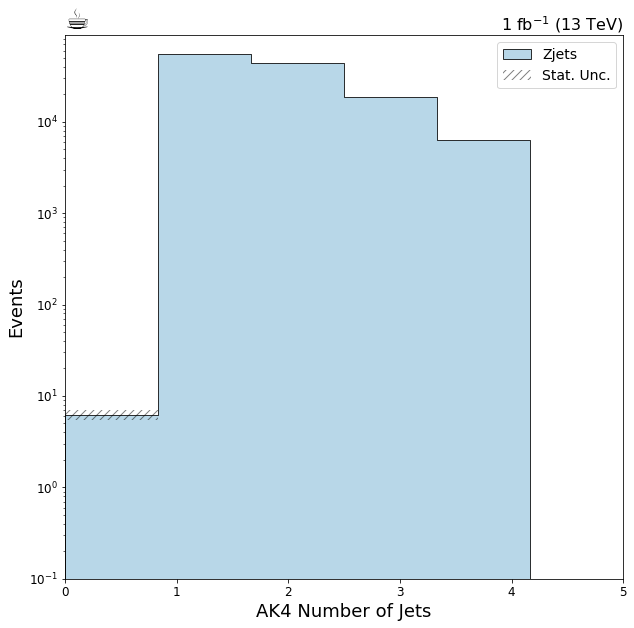

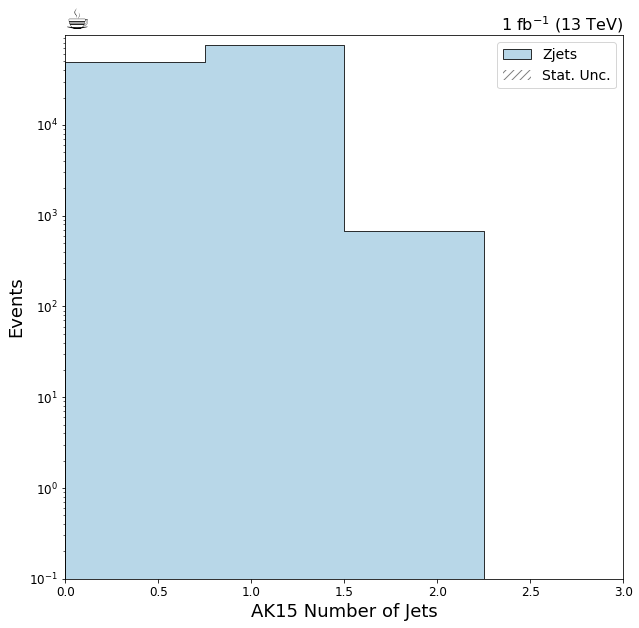

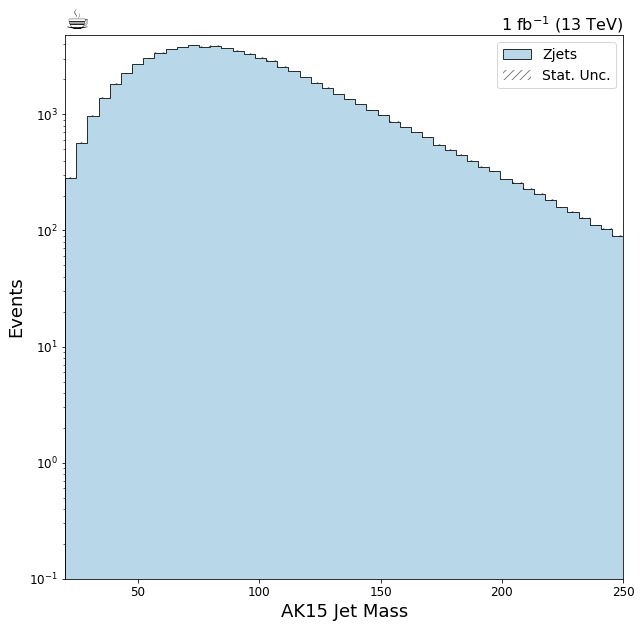

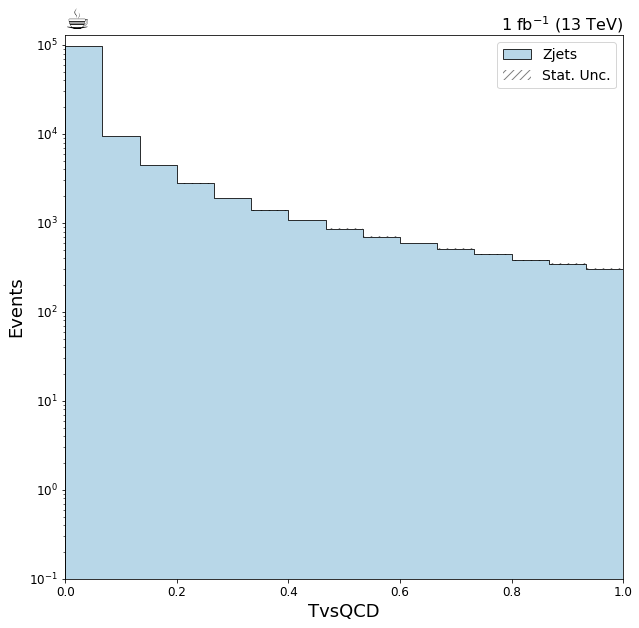

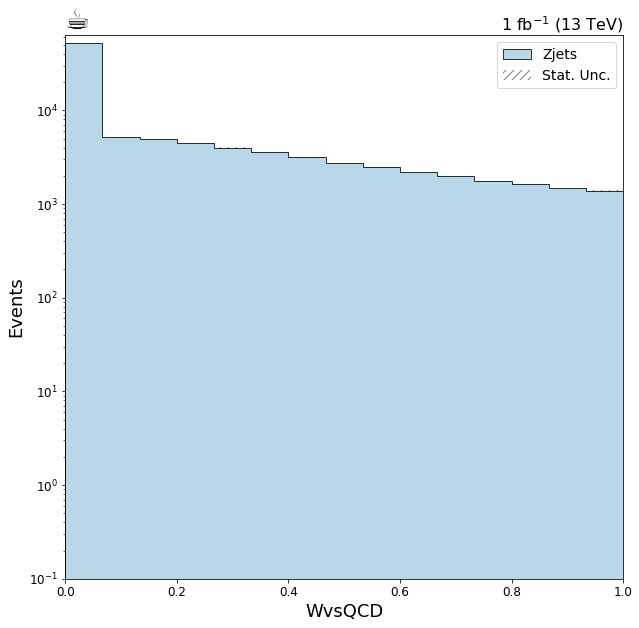

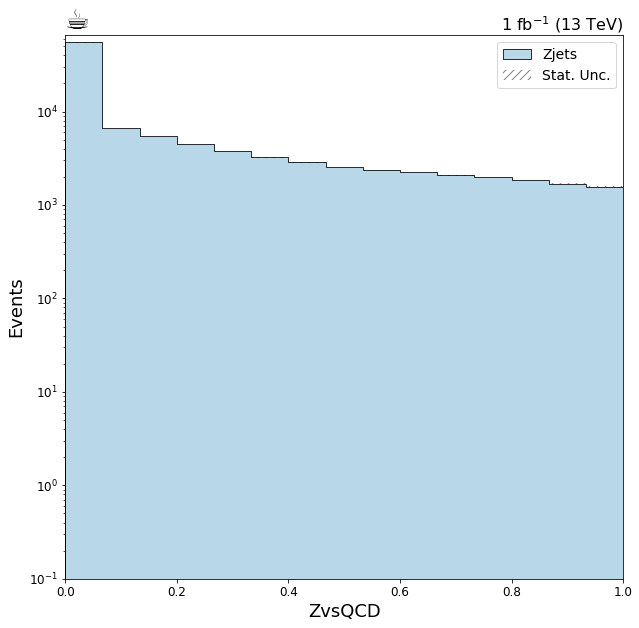

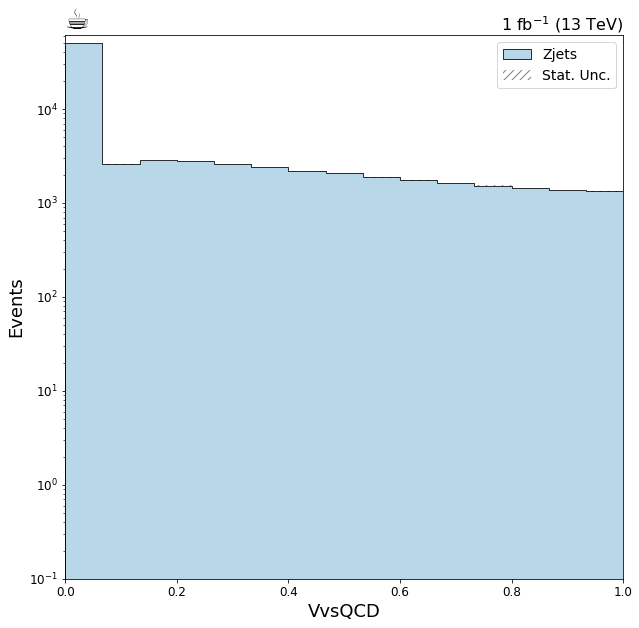

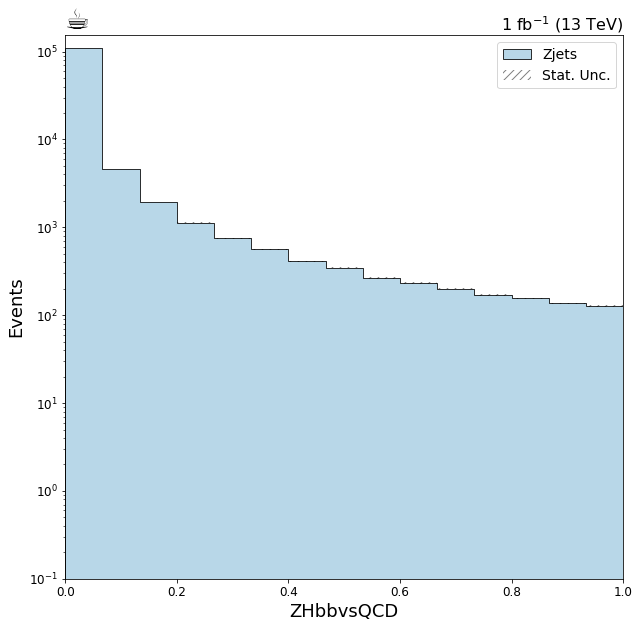

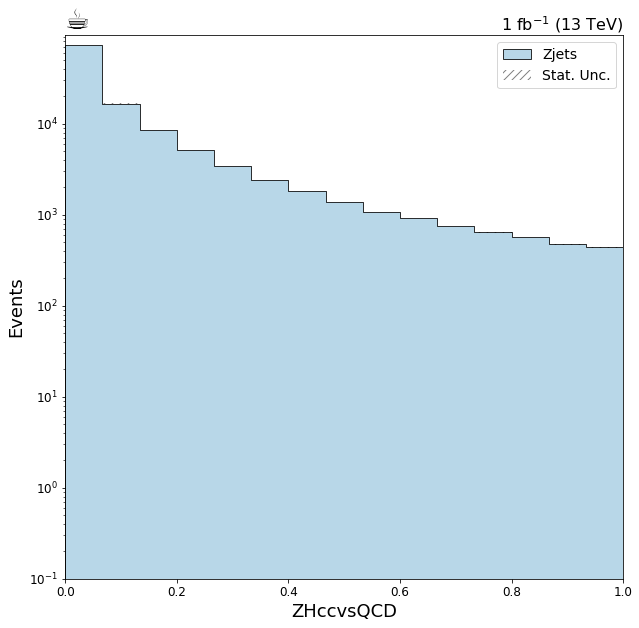

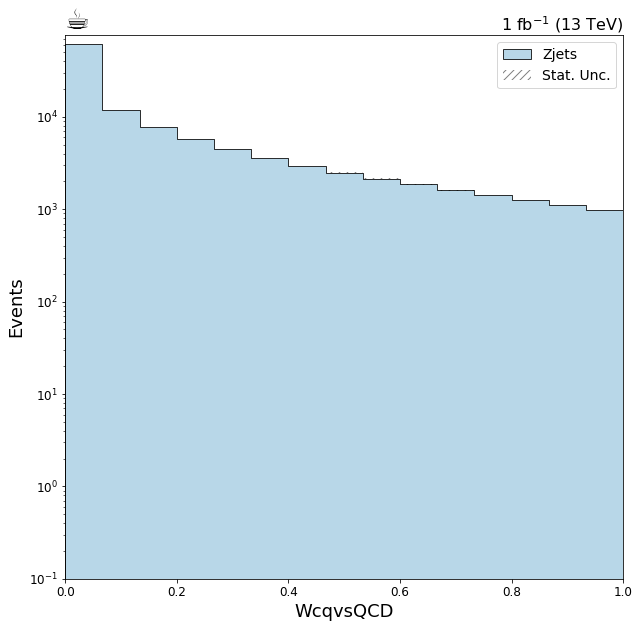

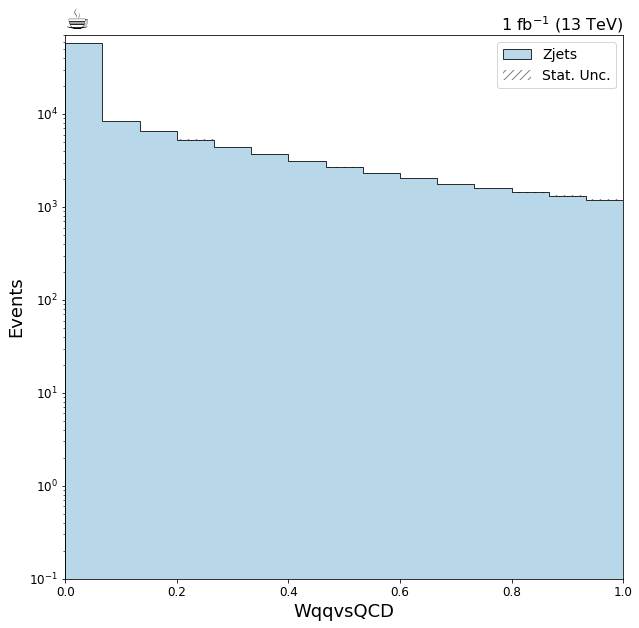

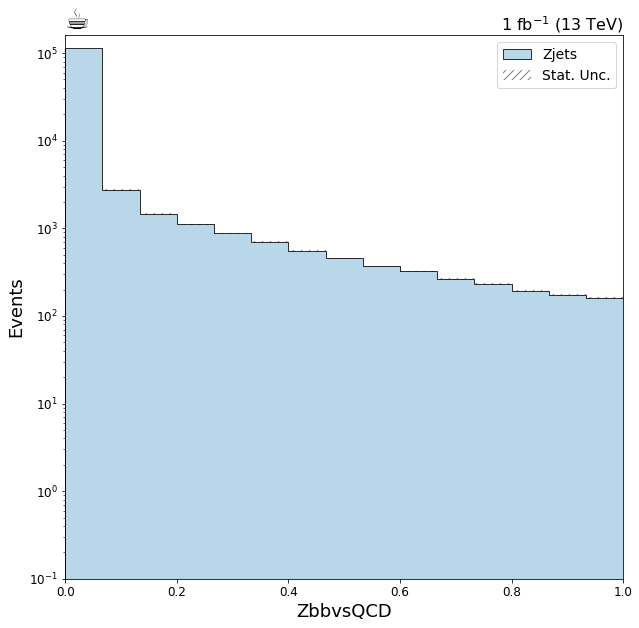

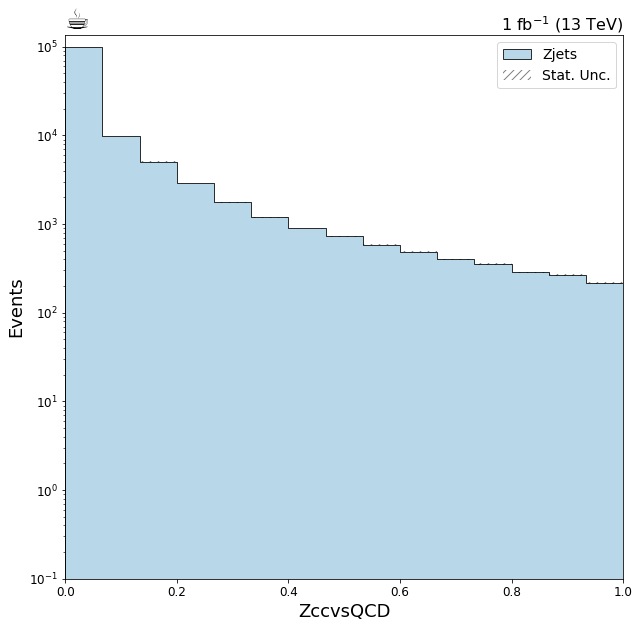

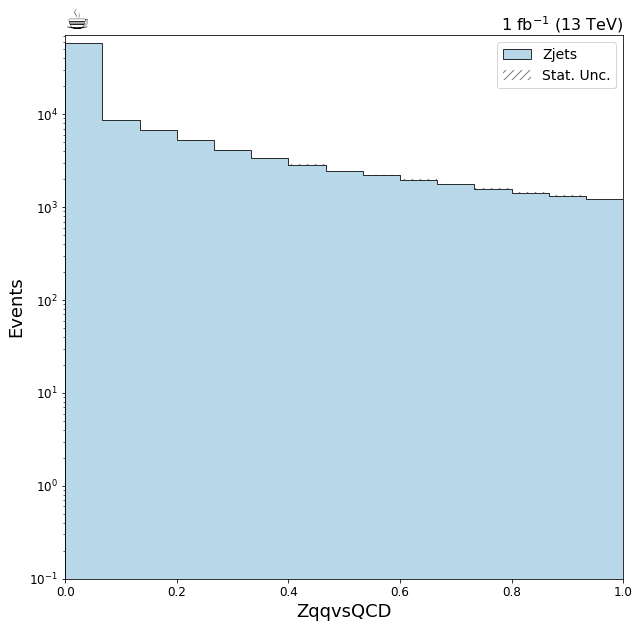

In [11]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']


for key in hists.keys():
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key], ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)